In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
df = pd.read_csv('./project3/repo/results.csv')

In [13]:
#for some hours,there are multiple minutes with "highest" price
df =df.drop_duplicates(subset=['name','hour'])
df.head(25)

,name,high,datetime,hour
0,BYND,137.970001,2020-05-14 09:39:00.000,9
1,BYND,139.559998,2020-05-14 10:31:00.000,10
2,BYND,141.000000,2020-05-14 11:15:00.000,11
3,BYND,138.240005,2020-05-14 12:57:00.000,12
4,BYND,137.789902,2020-05-14 13:00:00.000,13
5,BYND,135.730103,2020-05-14 14:12:00.000,14
6,BYND,135.850006,2020-05-14 15:54:00.000,15
7,DDOG,67.250000,2020-05-14 09:32:00.000,9
8,DDOG,66.550003,2020-05-14 10:09:00.000,10
9,DDOG,65.000000,2020-05-14 11:05:00.000,11


In [4]:
prices=[]
for name in df.name.unique():
    tmp=df[df.name==name].copy()
    tmp.drop_duplicates('hour')
    tmp['change']=tmp.high.diff().fillna(0)
    tmp=tmp[['name','change','hour']]
    prices.append(tmp)
    
prices = pd.concat(prices).groupby(['name','hour']).sum().reset_index()
prices


,name,hour,change
0,BYND,9,0.000000
1,BYND,10,1.589996
2,BYND,11,1.440002
3,BYND,12,-2.759995
4,BYND,13,-0.450104
...,...,...,...
65,TTD,11,6.786285
66,TTD,12,-2.356293
67,TTD,13,1.500000
68,TTD,14,-0.230011


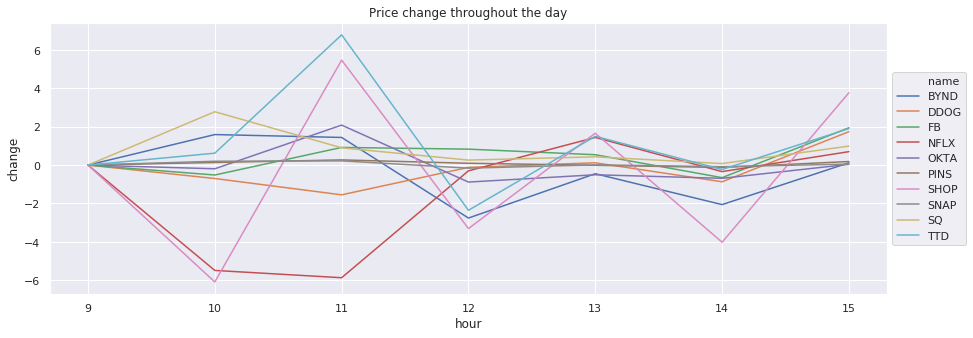

In [10]:
sns.set()
plt.figure(figsize=(15,5))
plt.title('Price change throughout the day')
sns.lineplot(x='hour',y='change',hue='name',data=prices)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

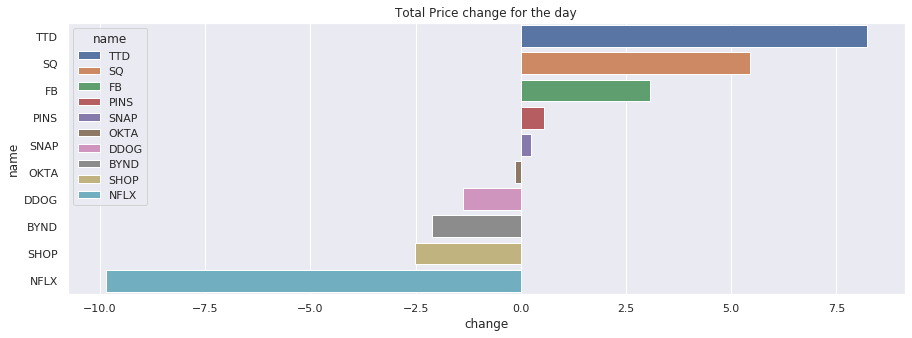

In [12]:
plt.figure(figsize=(15,5))
plt.title("Total Price change for the day")
agg = prices.groupby('name').sum().reset_index().sort_values(by='change',ascending=False)
sns.barplot(x='change',y='name',orient='h',hue='name',dodge=False,data=agg);